In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import risk_kit as rk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ind = rk.get_ind_returns()
er = rk.annualized_return(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [13]:
assets = ["Food", "Steel"]
rk.msr(0.1, er[assets], cov.loc[assets, assets])

array([0.75040362, 0.24959638])

In [14]:
er[assets]

Food     0.116799
Steel    0.115809
dtype: float64

In [15]:
rk.msr(0.1, np.array([0.11, 0.12]), cov.loc[assets, assets])

array([0.57930354, 0.42069646])

In [16]:
rk.msr(0.1, np.array([0.10, 0.13]), cov.loc[assets, assets])

array([0., 1.])

In [17]:
rk.msr(0.1, np.array([0.13, 0.10]), cov.loc[assets, assets])

array([1., 0.])

**Small changes in expected returns ends up causing a pretty dramatic change in weights**

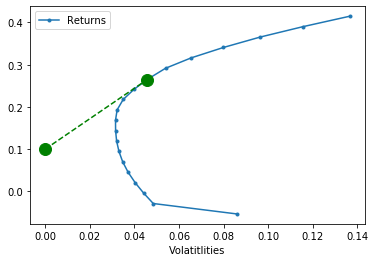

In [18]:
rk.plot_ef(20, er, cov, riskfree_rate=0.1, show_cml=True)

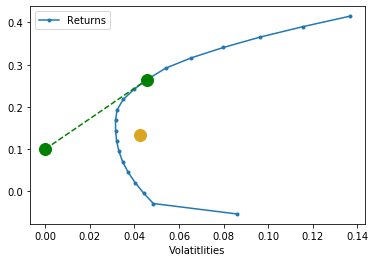

In [24]:
rk.plot_ef(20, er, cov, riskfree_rate=0.1, show_cml=True, show_ew=True)

```python
def gmv(cov):
    """
    Returns the weights of the Global Minimun Vol portfolio,
    given covariance matrix
    """
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)
```

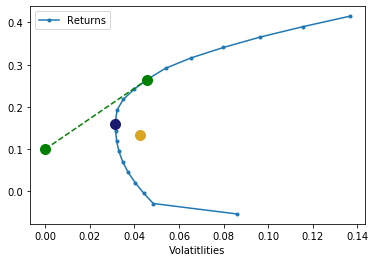

In [26]:
# The GMV doesn't depend of any estimate od expected return.
rk.plot_ef(20, er, cov, riskfree_rate=0.1, show_cml=True, show_ew=True, show_gmv=True)